In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
lego_sets = pd.read_csv('sets.csv')
lego_sets

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28


##### Question1: In which year were the first LEGO sets released and what were these sets called?

In [43]:
lego_sets.sort_values(by='year').head()

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7


###### Question2: Top 5 LEGO sets with the most number of parts.

In [44]:
lego_sets.sort_values(by='num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
170,10189-1,Taj Mahal,2008,276,5922
11614,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,169,5461
1337,2000409-1,Window Exploration Bag,2010,507,5200
161,10179-1,Millennium Falcon - UCS,2007,174,5195
8322,75827-1,Firehouse Headquarters,2016,301,4640


##### Question3: Showing the number of LEGO releases on a line chart

In [45]:
lego_sets_per_year = lego_sets.groupby('year')['set_num'].count()
lego_sets_per_year

year
1950      7
1953      4
1954     14
1955     28
1956     12
       ... 
2013    593
2014    713
2015    665
2016    596
2017    296
Name: set_num, Length: 66, dtype: int64

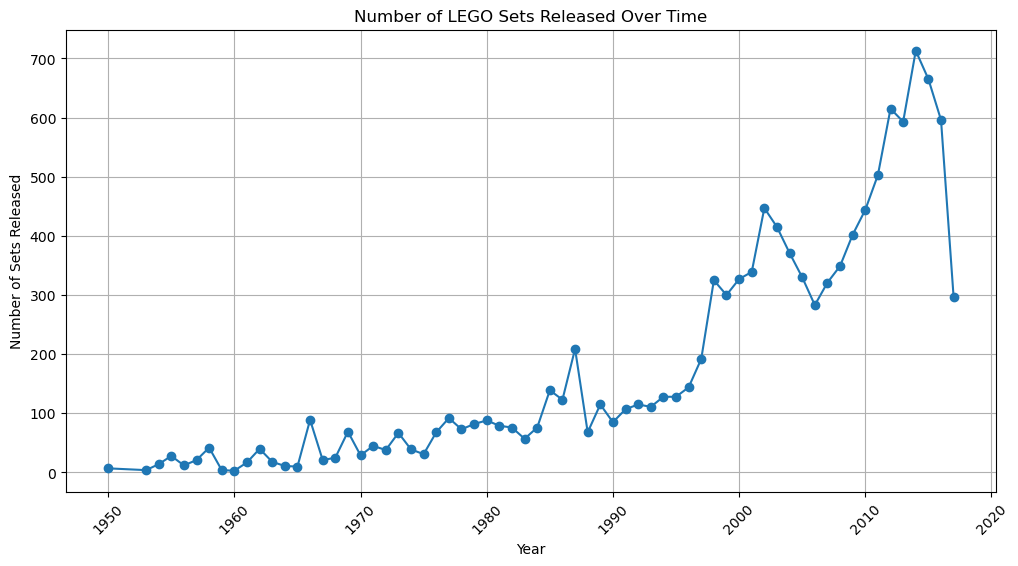

In [46]:
plt.figure(figsize=(12, 6))
lego_sets_per_year.plot(kind='line', marker='o')
plt.title('Number of LEGO Sets Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sets Released')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##### Question4: How many parts did the average LEGO set released in 1954 compared to say, 2017?



In [47]:
lego_sets_1954 = lego_sets[lego_sets['year'] == 1954]
lego_sets_2017 = lego_sets[lego_sets['year'] == 2017]

lego_avg_parts_1954 = lego_sets_1954['num_parts'].mean()
lego_avg_parts_2017 = lego_sets_2017['num_parts'].mean()

print("Average number of parts in a set released in 1954: " + str(lego_avg_parts_1954))
print("Average number of parts in a set released in 2017: " + str(lego_avg_parts_2017))

Average number of parts in a set released in 1954: 12.357142857142858
Average number of parts in a set released in 2017: 260.82094594594594


##### Question5: LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [48]:
lego_sets = pd.read_csv('sets.csv')
lego_sets

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28


In [49]:
lego_themes = pd.read_csv('themes.csv')
lego_themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
609,610,Brickheadz,NaN
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0


In [53]:
set_theme_count = lego_sets['theme_id'].value_counts()
set_theme_count.head()

# convert this pandas series into a pandas dataframe
set_theme_count = pd.DataFrame({'id':set_theme_count.index,
                    'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,501,246
1,371,240
2,504,219
3,220,216
4,494,192


In [56]:
# merging dataframes based on a key
merged_lego_data = pd.merge(set_theme_count, lego_themes, on='id')
merged_lego_data.head()

,id,set_count,name,parent_id
0,501,246,Gear,NaN
1,371,240,Supplemental,365.0
2,504,219,Duplo,NaN
3,220,216,City,217.0
4,494,192,Friends,NaN


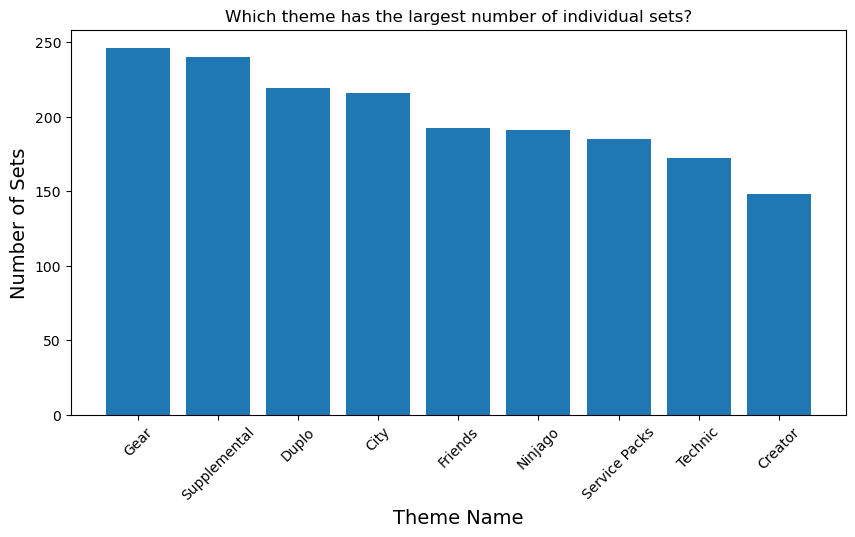

In [64]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.ylabel('Number of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.title('Which theme has the largest number of individual sets?')
plt.bar(merged_lego_data.name[:10], merged_lego_data.set_count[:10])
plt.show()